In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


In [20]:
#Import the dataset

data = pd.read_csv('../input/Mall_Customers.csv')

#Exploratory Data Analysis
#As this is unsupervised learning so Label (Output Column) is unknown

data.head(10) #Printing first 10 rows of the dataset


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [46]:
#total rows and colums in the dataset
data.shape
#not necessary


(200, 5)

In [21]:
del data['Gender']
del data['CustomerID']
data.info() # there are no missing values as all the columns has 200 entries properly
#Missing values computation
data.isnull().sum()
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3)
memory usage: 4.8 KB


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [22]:
#EDA-1
data.describe()
data.head()



,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


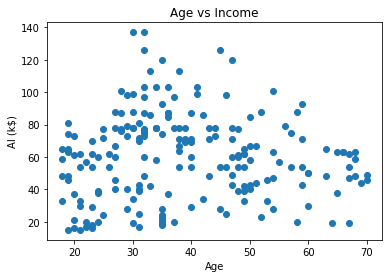

In [49]:
#EDA-2 Create the scatterplot
plt.scatter(data['Age'], data['Annual Income (k$)'])

# Add title and labels
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('AI (k$)')

# Display the plot - not necessary
plt.show()

In [30]:
#EDA-3 Correlation of variables - not necessary
#coeff1 = data['Age'].corr(data['Annual Income (k$)'])
#print(coeff1)
#coeff2 = data['Age'].corr(data['Spending Score (1-100)'])
#print(coeff2)
#coeff3 = data['Annual Income (k$)'].corr(data['Spending Score (1-100)'])
#print(coeff3)


X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train.shape


(160, 3)

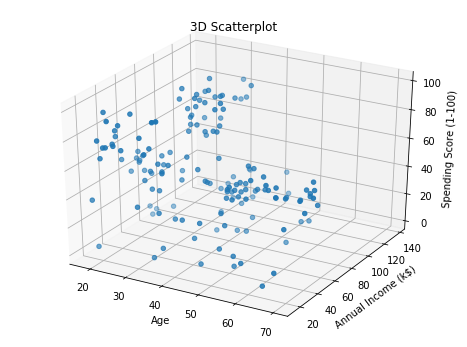

In [24]:
#EDA-4 ScatterPlot - not necessary
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['Age'], X_train['Annual Income (k$)'], X_train['Spending Score (1-100)'], cmap='viridis', marker='o')
#ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Age'], cmap='viridis', marker='o') 

# Add title and labels
ax.set_title('3D Scatterplot')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Display the plot
plt.show()

In [52]:
#Run K means Clustering version 1

#def kmeans(X, k):
    # Initialize centroids randomly
#    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

#    while True:
        # Assign each data point to the closest centroid
#        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
#        labels = np.argmin(distances, axis=0)

        # Update centroids
#        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
#        if np.all(centroids == new_centroids):
#            break

#        centroids = new_centroids

#    return centroids, labels

# Example usage
#X = data
#k = 2

#centroids, labels = kmeans(X, k)
#print("Centroids:")
#print(centroids)
#print("\nLabels:")
#print(labels)

In [26]:
#Run K means Clustering version 4 (Pandas DF)

# Create a sample DataFrame
#data = {'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'Feature2': [2, 3, 5, 7, 11, 13, 17, 19, 23]}
#df = pd.DataFrame(data)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

#features = ['Age','Spending Score (1-100)']
df_features = X_train[features]

# Perform K-means clustering
kmeans = KMeans(n_clusters=6)

#kmeans.fit(df)
kmeans.fit(df_features)


# Predict cluster labels
labels = kmeans.labels_

# Add cluster labels to the DataFrame
df_features['Cluster'] = labels

#print(df)
df_features.tail(10)

#Cluster0 = df_features[df_features['Cluster'] == 0]
#Cluster0.tail(10)

,Age,Annual Income (k$),Spending Score (1-100),Cluster
121,38,67,40,0
199,30,137,83,1
20,35,24,35,3
188,41,103,17,2
71,47,49,42,5
106,66,63,50,5
14,37,20,13,3
92,48,60,49,5
179,35,93,90,1
102,67,62,59,5


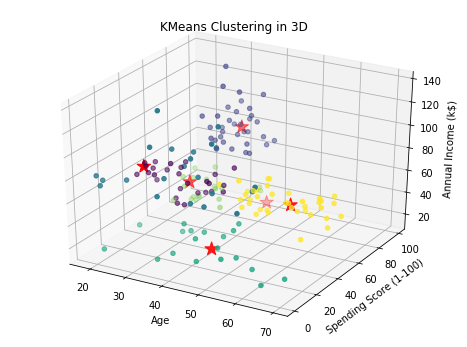

In [27]:
# Plot clusters
#plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'])
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], c='red', marker='*', s=200)
#XXXXXplt.scatter(kmeans.cluster_centers_['Age'], kmeans.cluster_centers_['Spending Score (1-100)'], c='red', marker='*', s=200)
#plt.xlabel('Age')
#plt.ylabel('Spending Score (1-100)')
#plt.title('K-means Clustering')
#plt.show()
#This code:
#1. Creates a sample DataFrame with two features.
#2. Performs K-means clustering with 3 clusters.
#3. Predicts cluster labels for each data point.
#4. Adds cluster labels to the DataFrame.
#5. Plots the clusters using different colors for each cluster. The cluster centers are marked with redstars.

#Next Steps. 
#Run 3D scatterplot - DONE 
# Create a 3D scatterplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_features['Age'], df_features['Spending Score (1-100)'], df_features['Annual Income (k$)'], c=labels)

# Plot cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='*', s=200)

# Set plot labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')
ax.set_title('KMeans Clustering in 3D')

# Show the plot
plt.show()

#clean up code and put into Github, confirm df[features] working to determine number of variables used - DONE
#review original code from KMeans clustering coder - DONE
#predict cluster of new data - DONE
#Put this and mental depression into Github - DONE

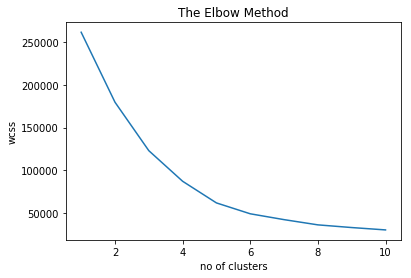

In [28]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
#from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_features)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [29]:
X_test.info() # there are no missing values as all the columns has 200 entries properly
X_test.shape
#Missing values computation
X_test.isnull().sum()
#df_features.head()

features1 = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_features1 = X_test[features1]

# Perform K-means clustering
kmeans1 = KMeans(n_clusters=6)

#kmeans.fit(df)
kmeans1.fit(df_features1)
predicted_clusters1 = kmeans1.predict(X_test)
print(predicted_clusters1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 3 columns):
Age                       40 non-null int64
Annual Income (k$)        40 non-null int64
Spending Score (1-100)    40 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB
[2 5 4 0 0 2 2 0 0 5 1 0 3 2 0 3 1 0 1 2 2 4 0 1 2 1 2 1 3 2 5 4 1 2 0 1 3
 3 0 1]
